# Закрепление знаний

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px

In [62]:
diabetes = pd.read_csv('data/diabetes_data.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Gender
0,6,98,58,33,190,34.0,0.430,43,0,Female
1,2,112,75,32,0,35.7,0.148,21,0,Female
2,2,108,64,0,0,30.8,0.158,21,0,Female
3,8,107,80,0,0,24.6,0.856,34,0,Female
4,7,136,90,0,0,29.9,0.210,50,0,Female


In [63]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 778 entries, 0 to 777
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               778 non-null    int64  
 1   Glucose                   778 non-null    int64  
 2   BloodPressure             778 non-null    int64  
 3   SkinThickness             778 non-null    int64  
 4   Insulin                   778 non-null    int64  
 5   BMI                       778 non-null    float64
 6   DiabetesPedigreeFunction  778 non-null    float64
 7   Age                       778 non-null    int64  
 8   Outcome                   778 non-null    int64  
 9   Gender                    778 non-null    object 
dtypes: float64(2), int64(7), object(1)
memory usage: 60.9+ KB


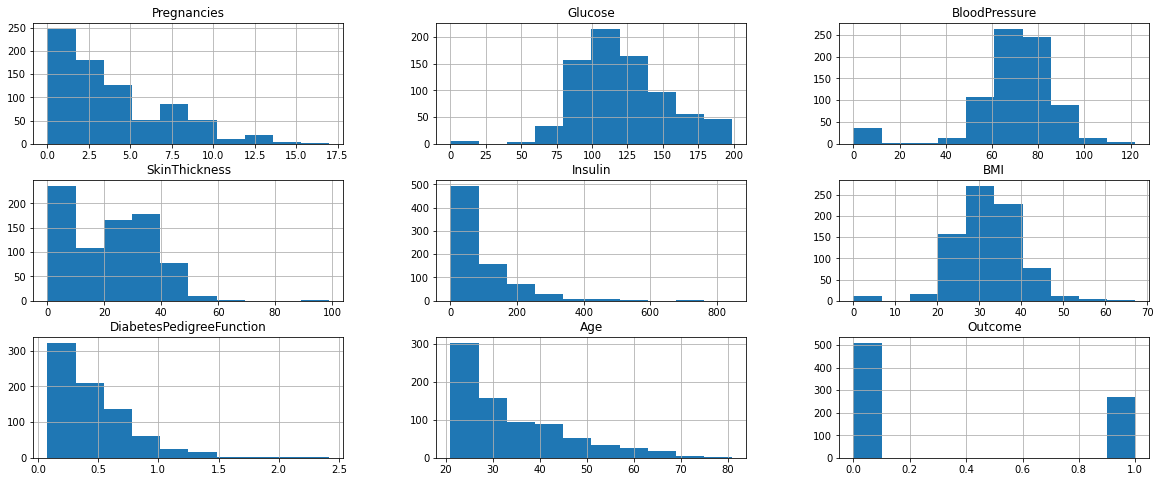

In [64]:
cols = diabetes.columns
diabetes[cols].hist(figsize=(20, 8));

In [65]:
diabetes = diabetes.drop_duplicates()
diabetes.shape[0]

768

In [66]:
#список неинформативных признаков
low_information_cols = [] 

#цикл по всем столбцам
for col in diabetes.columns:
    #наибольшая относительная частота в признаке
    top_freq = diabetes[col].value_counts(normalize=True).max()
    #доля уникальных значений от размера признака
    nunique_ratio = diabetes[col].nunique() / diabetes[col].count()
    # сравниваем наибольшую частоту с порогом
    if top_freq > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(top_freq*100, 2)}% одинаковых значений')
    # сравниваем долю уникальных значений с порогом
    if nunique_ratio > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(nunique_ratio*100, 2)}% уникальных значений')

Gender: 100.0% одинаковых значений


In [67]:
diabetes = diabetes.drop(['Gender'], axis=1)

In [68]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98,58,33,190,34.0,0.430,43,0
1,2,112,75,32,0,35.7,0.148,21,0
2,2,108,64,0,0,30.8,0.158,21,0
3,8,107,80,0,0,24.6,0.856,34,0
4,7,136,90,0,0,29.9,0.210,50,0


In [69]:
diabetes.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [70]:


def nan_function(x):
    return np.nan if x == 0 else x
diabetes["Glucose"] = diabetes["Glucose"].apply(nan_function)
diabetes["BloodPressure"] = diabetes["BloodPressure"].apply(nan_function)
diabetes["SkinThickness"] = diabetes["SkinThickness"].apply(nan_function)
diabetes["Insulin"] = diabetes["Insulin"].apply(nan_function)
diabetes["BMI"] = diabetes["BMI"].apply(nan_function)
diabetes.isnull().mean()*100
diabetes = diabetes.drop(['Insulin'], axis=1)
diabetes.info()






<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   BMI                       757 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 54.0 KB


In [72]:
m = diabetes.shape[1]
diabetes = diabetes.dropna(how='any', thresh=m-2, axis=0)
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98.0,58.0,33.0,34.0,0.430,43,0
1,2,112.0,75.0,32.0,35.7,0.148,21,0
2,2,108.0,64.0,NaN,30.8,0.158,21,0
3,8,107.0,80.0,NaN,24.6,0.856,34,0
4,7,136.0,90.0,NaN,29.9,0.210,50,0


In [74]:
values = {
    'Pregnancies' : diabetes['Pregnancies'].median(),
    'Glucose' : diabetes['Glucose'].median(),
    'BloodPressure' : diabetes['BloodPressure'].median(),
    'SkinThickness' : diabetes['SkinThickness'].median(),
    'BMI' : diabetes['BMI'].median(),
    'DiabetesPedigreeFunction' : diabetes['DiabetesPedigreeFunction'].median(),
    'Age' : diabetes['Age'].median(),
    'Outcome' : diabetes['Outcome'].median()
}
diabetes = diabetes.fillna(values)
diabetes['SkinThickness'].mean()

29.109067017082786

In [75]:
def outliers_iqr(data, feature):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    outliers = data[(x<lower_bound) | (x > upper_bound)]
    cleaned = data[(x>lower_bound) & (x < upper_bound)]
    return outliers, cleaned
outliers, cleaned = outliers_iqr(diabetes, 'SkinThickness')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')


Число выбросов по методу Тьюки: 87
Результирующее число записей: 674


In [76]:
def outliers_z_score(data, feature, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - 3 * sigma
    upper_bound = mu + 3 * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned
outliers, cleaned = outliers_z_score(diabetes, 'SkinThickness', log_scale=False)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу z-отклонения: 4
Результирующее число записей: 757


In [77]:
def outliers_iqr_mod(data, feature,  log_scale=False):
    if log_scale:
        x = np.log(data[feature])
    else:
        x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    outliers = data[(x<lower_bound) | (x > upper_bound)]
    cleaned = data[(x>lower_bound) & (x < upper_bound)]
    return outliers, cleaned
outliers, cleaned = outliers_iqr_mod(diabetes, 'DiabetesPedigreeFunction', log_scale=True)
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')


Число выбросов по методу Тьюки: 0
Результирующее число записей: 761


In [78]:
outliers, cleaned = outliers_iqr(diabetes, 'DiabetesPedigreeFunction')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 29
Результирующее число записей: 732
